### Regime Identification in Multivariate Time-series

In [2]:
import regimes
import numpy as np
import pandas as pd
import seaborn as sns
from clasp import ClaSP
from scipy import stats
from spdms import getSPDMs
from scipy.stats import norm
# import statsmodels.api as sm
# from sklearn import metrics
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 200

np.random.seed(1)

In [3]:
# Normalization (Standard)
def normalize(data, type='minmax'):

    if type=='std':
        return (np.array(data) - np.mean(data))/np.std(data)
        
    elif type=='minmax':
        return (np.array(data) - np.min(data))/(np.max(data) - np.min(data))

In [4]:
# Read real data (tectonic-climate time series)
data = pd.read_csv(r'../datasets/moxa_data_D.csv')

# Read synthetically generated time series
# data = pd.read_csv(r'../datasets/synthetic_datac.csv')

In [5]:
start, end = '2014-11-01', '2016-12-30'

# Appy mask get a segment from time series
# mask = (data['DateTime'] > '2014-11-01') & (data['DateTime'] <= '2015-12-28')
# data = data.loc[mask]

data = data.fillna(method='pad')
data = data.set_index('DateTime')
data = data[start: end]
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 791 entries, 2014-11-01 to 2016-12-30
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   rain                   791 non-null    float64
 1   temperature_outside    791 non-null    float64
 2   pressure_outside       791 non-null    float64
 3   gw_mb                  791 non-null    float64
 4   gw_sr                  791 non-null    float64
 5   gw_sg                  791 non-null    float64
 6   gw_west                791 non-null    float64
 7   gw_knee                791 non-null    float64
 8   gw_south               791 non-null    float64
 9   wind_x                 791 non-null    float64
 10  winx_y                 791 non-null    float64
 11  snow_load              791 non-null    float64
 12  humidity               791 non-null    float64
 13  glob_radiaton          791 non-null    float64
 14  strain_ew_uncorrected  791 non-null    float64


In [6]:
data.isnull().sum()

rain                     0
temperature_outside      0
pressure_outside         0
gw_mb                    0
gw_sr                    0
gw_sg                    0
gw_west                  0
gw_knee                  0
gw_south                 0
wind_x                   0
winx_y                   0
snow_load                0
humidity                 0
glob_radiaton            0
strain_ew_uncorrected    0
strain_ns_uncorrected    0
strain_ew_corrected      0
strain_ns_corrected      0
tides_ew                 0
tides_ns                 0
dtype: int64

In [7]:
data.isna().sum().sum()

0

In [8]:
data = data.apply(normalize)

In [9]:
data.isnull().sum()

rain                     0
temperature_outside      0
pressure_outside         0
gw_mb                    0
gw_sr                    0
gw_sg                    0
gw_west                  0
gw_knee                  0
gw_south                 0
wind_x                   0
winx_y                   0
snow_load                0
humidity                 0
glob_radiaton            0
strain_ew_uncorrected    0
strain_ns_uncorrected    0
strain_ew_corrected      0
strain_ns_corrected      0
tides_ew                 0
tides_ns                 0
dtype: int64

/home/ahmad/anaconda3/envs/deepcause/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


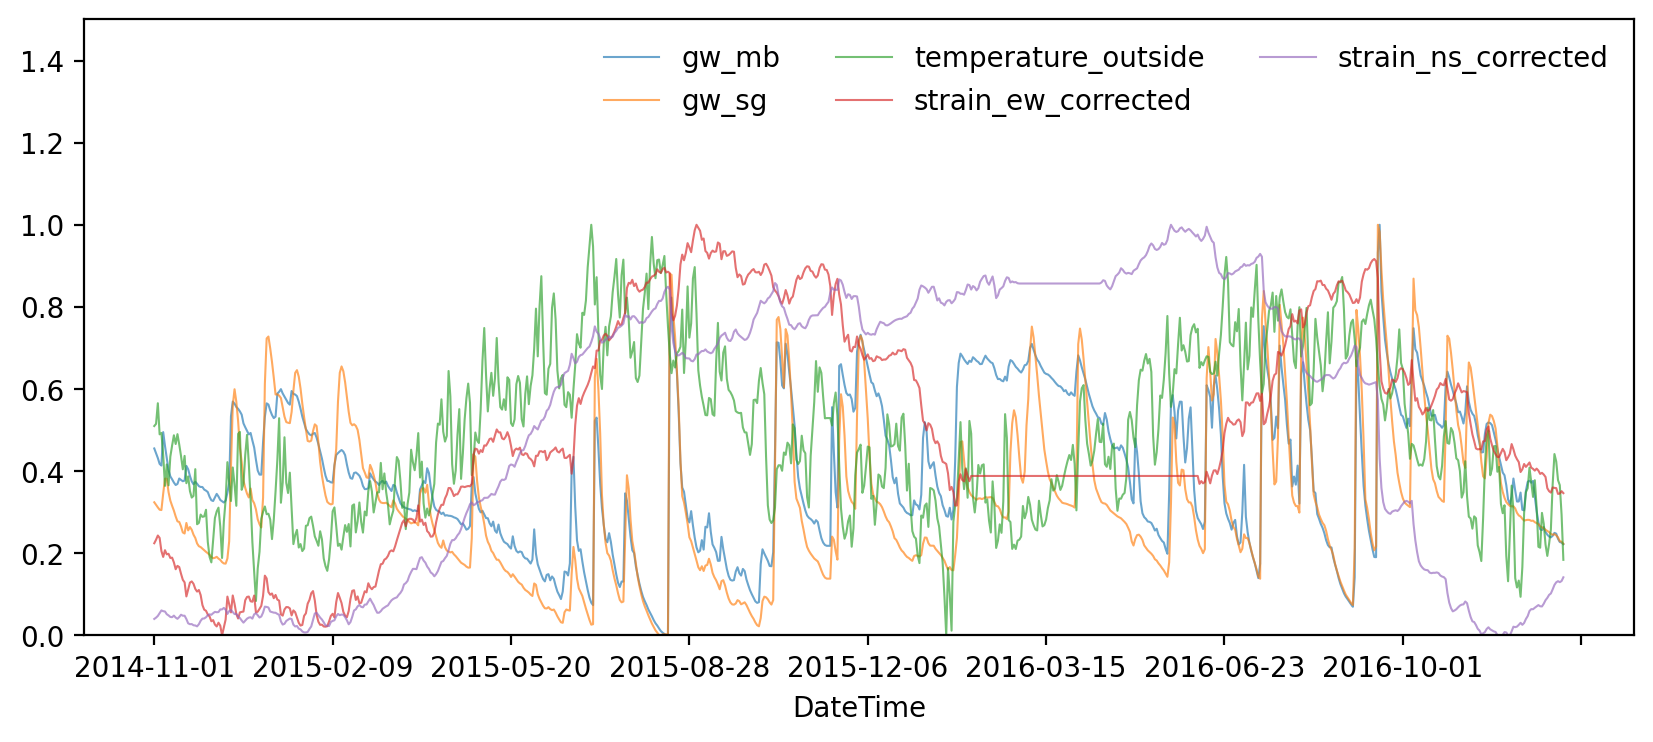

In [10]:
# toplot = [ 'rain', 'snow_load', 'pressure_outside','gw_mb', 'gw_sg', 'gw_west', 'strain_ns_corrected']
toplot = ['gw_mb', 'gw_sg', 'temperature_outside', 'strain_ew_corrected', 'strain_ns_corrected']
# toplot = ['Z1', 'Z2','Z3']

for i in toplot:
    data[i].plot(use_index=True, figsize=(10, 4), linewidth=0.75, alpha=0.66)
    plt.legend(toplot, frameon=False, ncol=3)


plt.ylim(0, 1.5)
# plt.gcf().autofmt_xdate()
# plt.legend(['Temperature', 'Ground Water', 'Strain_EW', 'Strain_NS'])
# plt.legend(['$Z_{1}$', '$Z_{2}$', '$Z_{3}$'])
# plt.savefig("synreg25Apr.png")
plt.show()

In [20]:
k = 2
winsize = 155 # 155
metricE = 'Euclidean'
metricR = 'Riemannian'
clusters, cluster_idx, *_ = regimes.get_regimes(data, winsize, k, metricR)

[1 0 1 1 0]
Clusters indecis: [0, 155, 310, 465, 620]


/home/ahmad/anaconda3/envs/deepcause/lib/python3.8/site-packages/pyriemann/utils/mean.py:456: UserWarning: Convergence not reached
  warnings.warn('Convergence not reached')


In [21]:
clusters_extended = []

for i in range(len(clusters)):

    val = clusters[i]
    for j in range(winsize):
        clusters_extended.append(val)
        
print(len(clusters_extended), data.shape)

775 (791, 20)


In [22]:
datanew = data.iloc[:len(clusters_extended), :].copy()
datanew['Clusters'] = clusters_extended

/home/ahmad/anaconda3/envs/deepcause/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


<Figure size 2400x800 with 0 Axes>

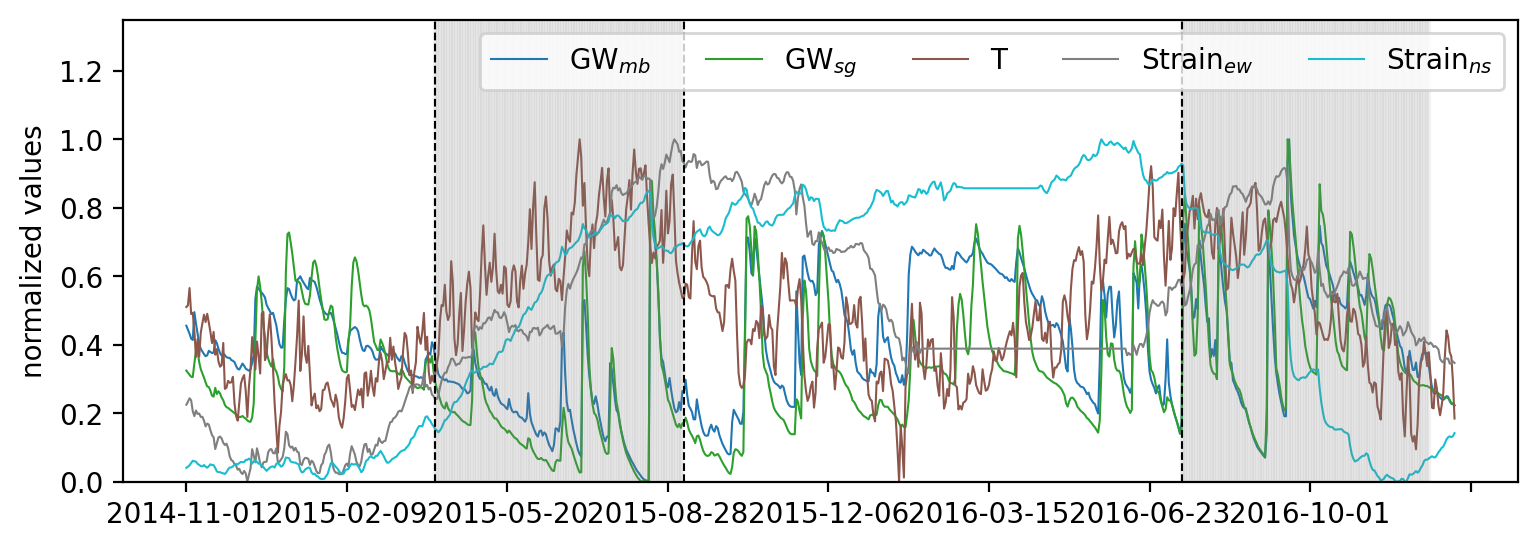

In [23]:
regimes.plot_regimes(data, clusters, cluster_idx, winsize, dtype='real')